In [9]:
#%matplotlib notebook
#%matplotlib notebook
%matplotlib inline

import os 
import umap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import natsort as n

from ipywidgets import *


import preproc as proc


from sklearn.manifold import TSNE




In [10]:
#!ls Latent_60/

In [11]:
Figure_1path = '/home/user/Documents/Antonin/Dimmy/ModelSave/15082022_164416_restart/predict/latent/data/blurred'
path = Figure_1path
all_latent = np.array([np.load(os.path.join(path, s)) for s in n.natsorted(os.listdir(path))]).reshape(len(os.listdir(path)), 100)
filenames = n.natsorted(os.listdir(path))
print(filenames)    

['6kto16k_2step_70dB.npy', '6kto16k_4step_70dB.npy', '6kto16k_6step_70dB.npy', '6kto16k_8step_70dB.npy', '6kto16k_10step_70dB.npy', '6kto16k_70dB.npy', '10kHz_20Hz_45dB.npy', '10kHz_20Hz_50dB.npy', '10kHz_20Hz_55dB.npy', '10kHz_20Hz_60dB.npy', '10kHz_31Hz_45dB.npy', '10kHz_31Hz_50dB.npy', '10kHz_31Hz_55dB.npy', '10kHz_31Hz_60dB.npy', '10kHz_50Hz_45dB.npy', '10kHz_50Hz_50dB.npy', '10kHz_50Hz_55dB.npy', '10kHz_50Hz_60dB.npy', '10kHz_79Hz_45dB.npy', '10kHz_79Hz_50dB.npy', '10kHz_79Hz_55dB.npy', '10kHz_79Hz_60dB.npy', '10kHz_126Hz_45dB.npy', '10kHz_126Hz_50dB.npy', '10kHz_126Hz_55dB.npy', '10kHz_126Hz_60dB.npy', '10kHz_200Hz_45dB.npy', '10kHz_200Hz_50dB.npy', '10kHz_200Hz_55dB.npy', '10kHz_200Hz_60dB.npy', 'AM_20Hz_500ms_70dB.npy', 'AM_23Hz_500ms_70dB.npy', 'AM_27Hz_500ms_70dB.npy', 'AM_31Hz_500ms_70dB.npy', 'AM_36Hz_500ms_70dB.npy', 'AM_43Hz_500ms_70dB.npy', 'AM_50Hz_500ms_70dB.npy', 'AM_58Hz_500ms_70dB.npy', 'AM_68Hz_500ms_70dB.npy', 'AM_79Hz_500ms_70dB.npy', 'AM_92Hz_500ms_70dB.npy', 'A

In [12]:
#Figure_1# Define color scales depending on task
cmap = matplotlib.cm.get_cmap('hsv')
colors = ['purple']*6 + ['orange']*24 + ['forestgreen']*16 + ['blue']*16

(78, 100)


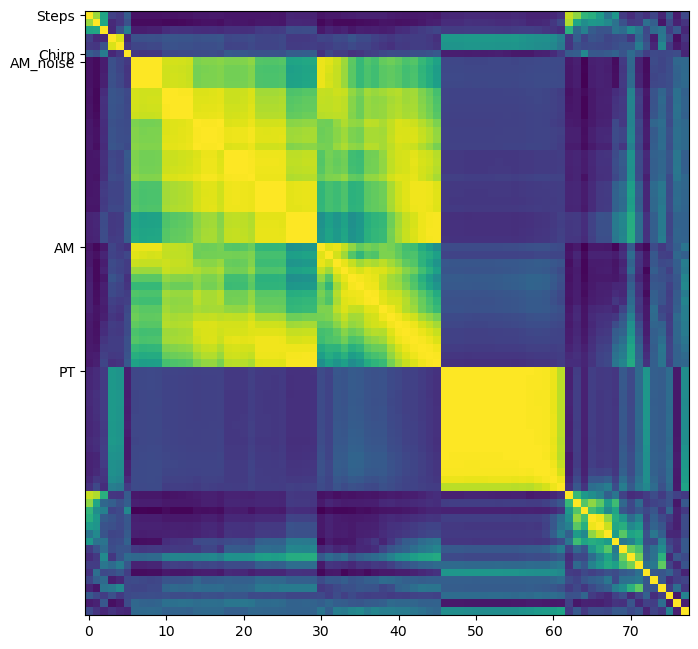

In [13]:
# Draw simple correlation matrix between vectors
plt.figure(figsize=(8, 8), dpi=100)
print(all_latent.shape)
corr_matrix = proc.correlation_matrix(all_latent)

plt.imshow(corr_matrix, cmap='viridis')
plt.yticks([0, 5, 6, 30, 46], ['Steps', 'Chirp', 'AM_noise', 'AM', 'PT'])
#plt.xticks([0, 2, 4], labels=['2S', '6S', '10S'], rotation='vertical')
plt.savefig('corr_matrix.svg')

plt.show()

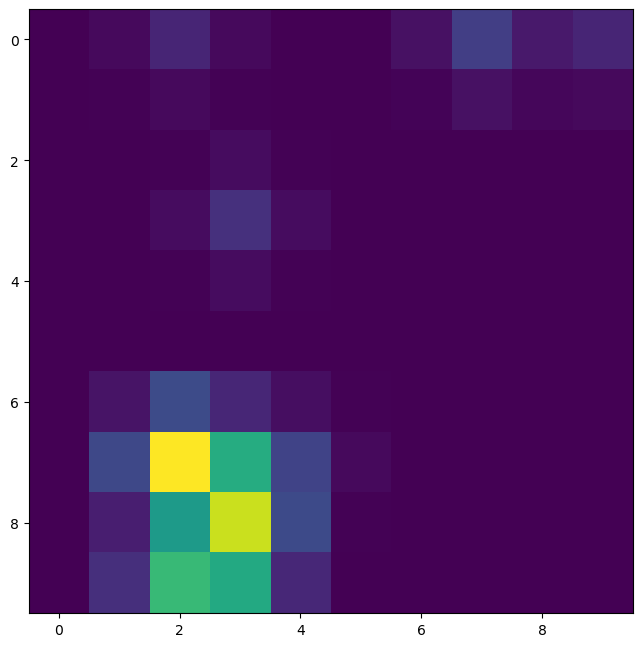

In [14]:
# Draw simple correlation matrix between vectors
plt.figure(figsize=(8, 8), dpi=100)
corr_matrix = proc.correlation_matrix(all_latent[-16:])
#plt.xticks([0, 2, 4], labels=['2S', '6S', '10S'], rotation='vertical')
plt.imshow(all_latent[0].reshape(10, 10))
#plt.plot(corr_matrix[0, :])

/home/user/anaconda3/envs/Antonin/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/user/anaconda3/envs/Antonin/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: 'c' argument has 62 elements, which is inconsistent with 'x' and 'y' with size 78.

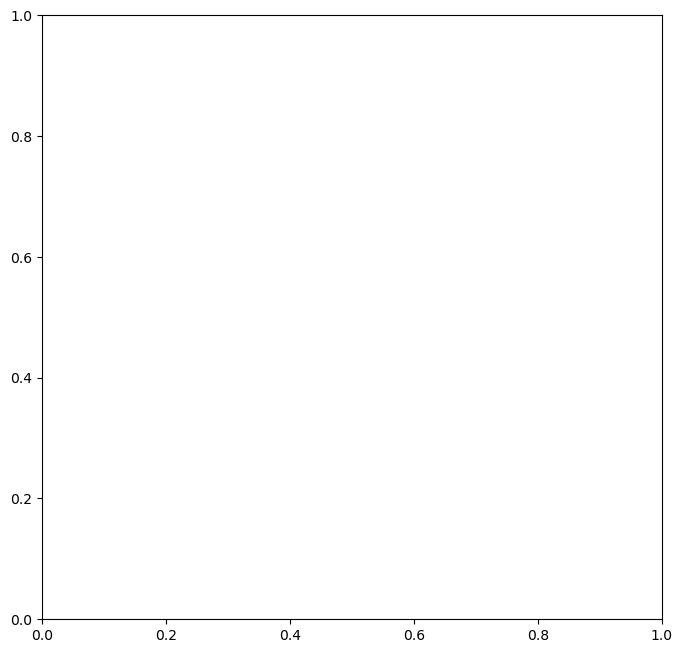

In [15]:

# Plot latent representation in TSNE space
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = fig.add_subplot()


clf = TSNE(n_components=2, perplexity=5,  n_jobs = -1 )
Y = clf.fit_transform(all_latent)
plot = ax.scatter(Y[:, 0], Y[:, 1], c=colors)
ax.set_xlabel('TSNE_1')
ax.set_ylabel('TSNE_2')

plt.savefig('Output/TSNE/tsne.svg')
plt.show()

In [ ]:
# the lower the better to estimate performances of TSNE --> 0.3 looks like a fair represenation
clf.kl_divergence_

In [ ]:
# Plot latent representation in UMAP space
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = fig.add_subplot()

clf = umap.UMAP(n_components=2, n_neighbors= 15, n_jobs = -1, min_dist = 0.3)
Y = clf.fit_transform(all_latent)

ax.scatter(Y[:, 0], Y[:, 1], c=colors)
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')

plt.savefig('Output/TSNE/umap.svg')
plt.show()

In [ ]:
# Compute euclidian distance between stimulus
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

euclidian_distance_matrix = np.array([proc.euclidian_distance(a, b) for a in all_latent for b in all_latent]).reshape(62, 62)
cosine_distance_matrix = np.array([proc.cosine_distance(a, b) for a in all_latent for b in all_latent]).reshape(62, 62)


#euclidian_distance_matrix = euclidian_distance_matrix/ euclidian_distance_matrix.max()
#cosine_distance_matrix = cosine_distance_matrix / cosine_distance_matrix.max()

axs[0].imshow(euclidian_distance_matrix)
axs[1].imshow(cosine_distance_matrix)

axs[0].set_title('Euclidian distance')
axs[1].set_title('Cosine distance')

#plt.savefig('distances.svg')

#plt.show()
#for f in filenames:
#    print(f[:-4])

## Estimating discontinuities

In [ ]:
from scipy.io.wavfile import read

In [ ]:
path_to_data =  "Data/SoundsHearlight"
path = path_to_data
all_sounds = np.array([read(os.path.join(path, s))[1] for s in n.natsorted(os.listdir(path))], dtype = float).reshape(len(os.listdir(path)), 96000)
filenames_sounds = n.natsorted(os.listdir(path))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

euclidian_distance_matrix_sounds = np.array([proc.euclidian_distance(a, b) for a in all_sounds for b in all_sounds]).reshape(62, 62)
cosine_distance_matrix_sounds = np.array([proc.cosine_distance(a, b) for a in all_sounds for b in all_sounds]).reshape(62, 62)

#euclidian_distance_matrix_sounds = euclidian_distance_matrix_sounds/ euclidian_distance_matrix_sounds.max()
#cosine_distance_matrix_sounds = cosine_distance_matrix_sounds / cosine_distance_matrix_sounds.max()

axs[0].imshow(euclidian_distance_matrix_sounds)
axs[1].imshow(cosine_distance_matrix_sounds)

axs[0].set_title('Euclidian distance')
axs[1].set_title('Cosine distance')

#axs[0].colorbar()

## Z-scoring Data and Latents

In [ ]:
from scipy.stats import zscore

In [ ]:
sounds_norm = zscore(all_sounds, axis = 1)
latent_norm = zscore(all_latent, axis = 1 )

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

euclidian_distance_matrix_sounds = np.array([proc.euclidian_distance(a, b) for a in sounds_norm for b in sounds_norm]).reshape(62, 62)
cosine_distance_matrix_sounds = np.array([proc.cosine_distance(a, b) for a in sounds_norm for b in sounds_norm]).reshape(62, 62)

#euclidian_distance_matrix_sounds = euclidian_distance_matrix_sounds/ euclidian_distance_matrix_sounds.max()
#cosine_distance_matrix_sounds = cosine_distance_matrix_sounds / cosine_distance_matrix_sounds.max()

axs[0].imshow(euclidian_distance_matrix_sounds)
axs[1].imshow(cosine_distance_matrix_sounds)

axs[0].set_title('Euclidian distance')
axs[1].set_title('Cosine distance')

In [ ]:
import matplotlib.colors as colors

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

euclidian_distance_matrix_sounds = np.array([proc.euclidian_distance(a, b) for a in sounds_norm for b in sounds_norm]).reshape(62, 62)
euclidian_distance_matrix = np.array([proc.euclidian_distance(a, b) for a in latent_norm for b in latent_norm]).reshape(62, 62)

euclidian_distance_matrix_sounds = euclidian_distance_matrix_sounds/ euclidian_distance_matrix_sounds.max()
euclidian_distance_matrix = euclidian_distance_matrix/ euclidian_distance_matrix.max()
#cosine_distance_matrix_sounds = cosine_distance_matrix_sounds / cosine_distance_matrix_sounds.max()

map_0 = axs[0].imshow(euclidian_distance_matrix_sounds)
map_1 = axs[1].imshow(euclidian_distance_matrix)

axs[0].set_title('Euclidian distance sounds')
axs[1].set_title('Euclidean distance latents')

fig.colorbar(map_0, ax = axs[0])
fig.colorbar(map_1, ax = axs[1])

In [ ]:
plt.figure(figsize = (12,6))
plt.imshow(euclidian_distance_matrix_sounds - euclidian_distance_matrix)
plt.colorbar()

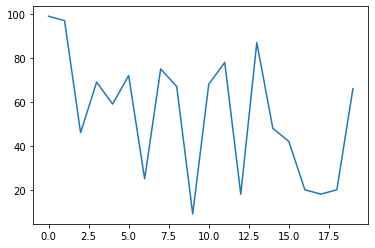

In [21]:
import librosa
root = '/home/user/Documents/Antonin/Dimmy/Clean_sounds_datasetv2_60/PT_30319_500ms_70dB_noise6.wav'
sample, samplerate = librosa.load(root, sr=64000)

a = np.random.randint(1, 100, 20)
plt.plot(range(len(a)), a)

